# Federal Realty Investment Trust
Last update: 28 Nov 2021  
Annual report: 2020  
Stock price used in analysis is from 10 Oct 2021   

## Abstract
This notebook was developed to use as a template to analyze dividend paying companies as potential investments. This company was selected for analysis because it is on the Dividend Aristocrat list and passes the quick look tests.  

## Introduction
[Federal Realty](https://www.federalrealty.com/investors/overview/) is a recognized leader in the ownership, operation and redevelopment of high-quality retail-based properties located primarily in major coastal markets from Washington, D.C. to Boston as well as San Francisco and Los Angeles.

The stated primary business objective is to own, manage, acquire and redevelop a portfolio of high quality retail focused properties that will:
- provide increasing cash flow for distribution to shareholders;
- generate higher internal growth than the shopping center industry over the long term;
- provide potential for capital appreciation; and
- protect investor capital.

The company specializes in the ownership, management, and redevelopment of high quality retail and mixed-use
properties located primarily in densely populated and affluent communities in strategically selected metropolitan markets in the Northeast and Mid-Atlantic regions of the United States, as well as in California and South Florida. As of December 31, 2020, the company owned or had a majority interest in community and neighborhood shopping centers and mixed-use properties which are operated as 101 predominantly retail real estate projects comprising approximately
23.4 million square feet.

Sector(s): Real Estate  
Industry: REIT—Retail  
Earnings Date: Nov 04, 2021  
Ex-Dividend Date: Sep 21, 2021  

## Bottom line up front
Recommendation: buy  
Follow the link to the [Conclusion](#section11).  

## Company description
[Federal Realty Investment Trust](https://en.wikipedia.org/wiki/Federal_Realty_Investment_Trust#cite_note-10K-1) is a real estate investment trust that invests in shopping centers in the Northeastern United States, the Mid-Atlantic states, California, and South Florida.

**Revision history:**  
- 10/9/2021: Copied from ESS notebook
- 11/27/2021: removed ValuePro section, re-wrote dividend discount section, add plots to new section 14.

## Analysis
The following sections of this notebook contain the financial analysis for the company.  

**Contents** <a id="section0"></a>  

1. [Quick look](#section1)
2. [Blank](#section2)
3. [Load financial statement data](#section3)
4. [NACI stock selection guide analysis](#section4)
5. [Format financial statements data](#section5)
6. [Discounted cash flow analysis, baseline](#section6)
7. [DCF Scenarios](#section7)
8. [Dividend Discount Model](#section8)
9. [Value analysis](#section9)
10. [Peer analysis](#section10) 
11. [Conclusion](#section11)
12. [Notes](#section12)
13. [References](#section13)
14. [Additional plots](#section14)

In [1]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## 1) Quick look <a id="section1"></a>
This section is completed first since the effort involved is much less compared to the other analysis sections in this notebook.  Some of the data looked at in this section is also available from the Fidelity company report.    

**Current news**  


**Review quarterly results**  
Take a look at recent quarterly results to see if trends from the previous annual report are in line.
- https://finance.yahoo.com/quote/FRT?p=FRT
- The Fidelity report shows

Need a method to do quarterly review

**Average daily volume**  
The average daily volume in the stock market needs to be high enough to be liquid and should be over 1 million.  
Average daily volume: 462,839  
The average daily volume is below 1 million shares per day, but if other criteria are acceptable, then the average daily volume can be given a pass.

**Dividend yield**  
Looking for a dividend yield between 2% to 6%.

In [2]:
# data from yahoo finance, on 9-26-2021
share_price = 121.92
dividend = 4.28 # Forward Dividend
print('dividend yield: {:.1f} %'.format(dividend/share_price*100))

dividend yield: 3.5 %


**Debt to equity ratio**  
The debt to equity ratio shows the proportion of equity and debt a company is using to finance its assets and signals the extent to which shareholder's equity can fulfill obligations to creditors, in the event of a business decline.

The debt to equity ratio compares a company’s total liabilities to its shareholder equity and can be used to evaluate how much leverage a company is using. Higher-leverage ratios tend to indicate a company with higher risk to shareholders. However, the D/E ratio is difficult to compare across industry groups where ideal amounts of debt will vary. Investors will often modify the D/E ratio to focus on long-term debt only because the risks associated with long-term liabilities are different than short-term debt and payables.

A good debt to equity ratio is around 1 to 1.5. However, the ideal debt to equity ratio will vary depending on the industry because some industries use more debt financing than others.  Here I'm looking for a value less than 2.

In [3]:
# data from yahoo finance, on 10-10-2021
debt = 4291375 # Long term Debt
equity = 2464157 # Stockholders' Equity
print('debt to equity ratio: {:.2f}'.format(debt/equity))

debt to equity ratio: 1.74


The Fidelity report gives the Total Debt to Equity: 193.9x.  D/E is explored in more detail later.  

**Dividend Payout Ratio Using Earnings**  
The Dividend Payout Ratio (DPR) is the amount of dividends paid to shareholders in relation to the total amount of net income the company generates. In other words, the dividend payout ratio measures the percentage of net income that is distributed to shareholders in the form of dividends.

$\text{DPR} = \frac {\text{Total dividends}} {\text{Net income}}$  

For financially strong companies in these industries, a good dividend payout ratio is less than 75% of their earnings. However, companies in fast-growing sectors or those with more volatile cash flows and weaker balance sheets need a lower dividend payout ratio. Ideally, it should be below 50%.

Therefore, a 25% dividend payout ratio shows that Company A is paying out 25% of its net income to shareholders. The remaining 75% of net income that is kept by the company for growth is called retained earnings.

For a REIT, Dividend Payout Ratio does not apply since REIT is required to payout 95%.  

In [4]:
dividend = 324596 # Common Stock Dividend Paid
earnings = 131706 # Net income
print('Dividend Payout Ratio Using Earnings: {:.2f}'.format(dividend/earnings))

Dividend Payout Ratio Using Earnings: 2.46


**Dividend Payout Ratio Using Cash Flow**  
Free Cash Flow Payout is simply Annual Dividend divided by Free Cash Flow.

$\text{FCFP} = \frac {\text{Dividends}} {\text{Free Cash Flow}}$  

It should be 70% or less. However, this does not apply to a REIT since they are required to pay out 95%.

https://seekingalpha.com/article/3148576-dividend-payout-vs-free-cash-flow-payout  
https://www.dividend-growth-stocks.com/2007/10/dividend-stock-and-etfcef-holdings.html  
https://dividendcultivator.com/2020/09/08/choose-your-dividend-payout-ratio-wisely-free-cash-flow-vs-income/  

In [5]:
# Dividend Payout Ratio Using Cash Flow
Cash_Flow = 132007 # Cash, cash equivalents and restricted cash, end of year
print('Dividend Payout Ratio Using Cash Flow: {:.2f}'.format(dividend/Cash_Flow))

Dividend Payout Ratio Using Cash Flow: 2.46


For a REIT, Dividend Payout Ratio does not apply since REIT is required to payout 95%.  

## 2) Blank <a id="section1"></a>
This has been deleted. It was about [ValuePro](http://www.valuepro.net/index.shtml), an online intrinsic value calculator based on the discounted free cash to the firm model.  The calculations follow the method described in [2].  The results are useful as a quick look, but I've sometimes found the inputs to the model to be very different from what I would use and the calculated intrinsic value is suspect.

## 3) Load financial statement data <a id="section3"></a>
Data from consolidated financial statements and annual reports was collected and entered into a spreadsheet. All numerical data is converted from thousands or millions of dollars to dollars.  The stock share price history was obtained from yahoo and is included as a tab in the spreadsheet.  Other tabs in the spreadsheet are various worksheets. 

In [6]:
ticker = 'FRT' # company ticker symbol
os.chdir('/home/jim/Documents/Dividend Investing/DCF data/')

file_name = ticker+'_Financials.xlsx'
df_financials = pd.read_excel(file_name,sheet_name='DCF data')
df_NAIC_financials = pd.read_excel(file_name,sheet_name='NAIC data')
df_metrics = pd.read_excel(file_name,sheet_name='metrics')
df_price_history = pd.read_excel(file_name,sheet_name='Historical Prices')

# change the working director back to the Jupyter folder
os.chdir('/home/jim/Documents/JupyterLab/Discount Cash Flow Analysis/')

In [7]:
# convert dates from string to datetime format
price_date_list = []
for i in range(len(df_price_history)):
    price_date_list.append(datetime.strptime(str(df_price_history['Date'][i]), '%Y-%m-%d'))

df_price_history.insert(0, 'datetime', price_date_list)  # insert a new column with datetime data
df_price_history.sort_values(by=['datetime'], inplace=True) # sort data frame by datetime

df_price_history.set_index('datetime',inplace=True)

#df_price_history.head()

## 4) NACI stock selection guide analysis <a id="section4"></a>
This analysis follows the NAIC stock selection guide (SSG) [1].  The SSG relates revenue growth, EPS and share price history and makes a prediction about the future share price.    

The National Association of Investors Clubs (NAIC) is a nonprofit organization dedicated to educating individual investors and investment clubs to become successful lifelong investors.  NAIC's Stock Selection Guide (SSG) is used in the following cells to analyze the company's growth and whether the stock is selling at a reasonable price.

The SSG was originally developed in the 1950s as a paper worksheet by the not-for-profit National Association of Investors Corporation (NAIC). The SSG aims to aid individual investors in the fundamental analysis and selection of common stocks by reviewing components of a company's growth, quality, and value.

In [8]:
#column names: fiscal years 
years_list = df_NAIC_financials.columns[1:].values.astype('str')[::-1]

# convert years to datetime format
year_ended_list = []
for i in years_list:
    year_ended_list.append(datetime.strptime(i, '%Y'))

#line 0: revenue  
revenue = df_NAIC_financials.iloc[0].to_numpy()[1:].astype('float')[::-1]
#line 1: earnings per share
EPS = df_NAIC_financials.iloc[1].to_numpy()[1:].astype('float')[::-1]

**High and low price history for each year**  
From the daily price history obtained from yahoo finance, the high and low closing price for each is obtained and the data saved to the financial data frame as new columns.

In [9]:
fy_open = []
fy_close = []
fy_high = []
fy_low = []

for i in year_ended_list:
    start = i
    end = i + relativedelta(years=1)
    p1 = df_price_history.truncate(before=start, after=end)
    if len(p1) == 0:
        fy_open.append(np.nan)
        fy_close.append(np.nan)        
        fy_high.append(np.nan)
        fy_low.append(np.nan)
    else:
        fy_open.append(p1['Open'].iloc[0])
        fy_close.append(p1['Close'].iloc[-1])        
        fy_high.append(p1['High'].max())
        fy_low.append(p1['Low'].min())

# convert from list to numpy array
fy_open = np.asarray(fy_open)
fy_close = np.asarray(fy_close)
fy_high = np.asarray(fy_high)
fy_low = np.asarray(fy_low)

**Plotting the data**  
The annual sales, EPS and the high and low share price are traditionally plotted on a semilog plot. A consistent percentage change in the data will plot on the semi-log chart as a straight line, but for a company having a modest growth rate, a linear scale works better to show the year to variation. 

The stock price is plotted separately from the sales and earnings for clarity.

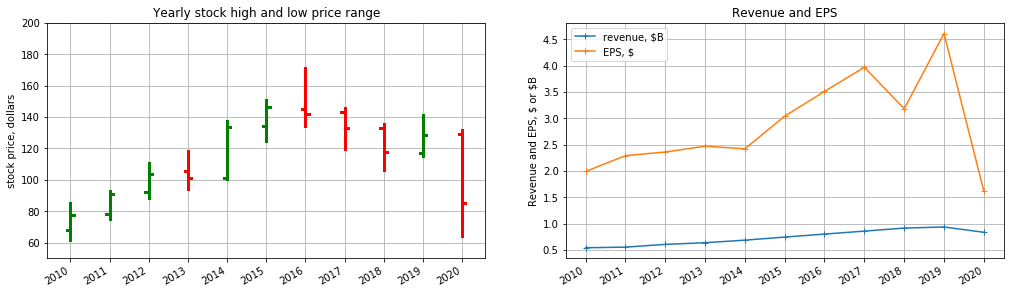

In [10]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

# figsize() function to adjust the size
plt.subplots(figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
width = 3  # the width of the bars
#plt.bar(year_ended_list,fy_high-fy_low, width,bottom=fy_low,label='price')
j = 0
for i in year_ended_list:
    color = 'green'
    if fy_open[j] > fy_close[j]: color= 'red'
    # high/low lines
    plt.plot([i,i],[fy_low[j],fy_high[j]],color=color, linewidth=width)
    # open marker
    plt.plot([i,i-relativedelta(months=1)], [fy_open[j],fy_open[j]], color=color, linewidth=width)
    # close marker
    plt.plot([i,i+relativedelta(months=1)], [fy_close[j],fy_close[j]], color=color, linewidth=width)
    j += 1

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((50,200))
plt.title('Yearly stock high and low price range')
plt.ylabel('stock price, dollars')
#plt.legend()
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

plt.plot(year_ended_list,revenue/1e9,'+-',label='revenue, $B')
plt.plot(year_ended_list,EPS,'+-',label='EPS, $')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.yscale('log')
#plt.yticks([0.1,1,10,100,1000,10000],['0.1','1','10','100','1000','10000'])
#plt.ylim((0.1,1000))
plt.title('Revenue and EPS')
plt.ylabel('Revenue and EPS, \\$ or \\$B')
plt.legend()

plt.grid()

# space between the plots
plt.tight_layout(4)

# show plot
plt.show()

**Observations:**  
Share price is trading in an upward trend from 2010 to 2016, then reversed for the years 2017 to 2019. The effects of Covid-19 are in the 2020 financial results.  Revenues are increasing a bit, except for 2020 and earnings are slowing increasing, except for 2020.  

**Price earnings history**  
Section 3 of the SSG is the Price-Earnings history.  The following table is built from the high and low prices each year and the earnings per share. The high and low Price/Earnings ratios are calculated for each year and are listed in the columns labeled h-per and l-per.

In [11]:
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('year','high','low','eps',
    'h-per','l-per'))
for i in range(len(year_ended_list)):
    print('{:s}{:10,.2f}{:10,.2f}{:10,.2f}{:10,.2f}{:10,.2f}'.format(year_ended_list[i].strftime("%Y"),
        fy_high[i], fy_low[i],EPS[i],
        fy_high[i]/EPS[i],
        fy_low[i]/EPS[i]))

year      high       low       eps     h-per     l-per
2010     85.00     61.93      1.99     42.71     31.12
2011     93.18     75.31      2.29     40.69     32.89
2012    110.51     88.79      2.36     46.83     37.62
2013    118.52     94.35      2.47     47.98     38.20
2014    137.80    100.37      2.42     56.94     41.48
2015    151.11    124.87      3.04     49.71     41.08
2016    171.08    134.39      3.51     48.74     38.29
2017    145.80    119.37      3.97     36.73     30.07
2018    135.68    106.41      3.18     42.67     33.46
2019    141.35    115.09      4.61     30.66     24.97
2020    131.56     64.11      1.62     81.21     39.57


**Average high and P/E for select years**   
The average price to earning ratio based on high and low stock prices is calculated.

In [12]:
#Average high P/E for last 5 years 
pe_avg_high = (fy_high/EPS)[-5:].mean()
print('average high P/E {:.2f}'.format(pe_avg_high))
#Average low P/E for years 
pe_avg_low = (fy_low/EPS)[-5:].mean()
print('average low P/E {:.2f}'.format(pe_avg_low))

average high P/E 48.00
average low P/E 33.27


**Estimate future EPS**  
A least squares fit is used to get the slope of the EPS data points.

In [13]:
# get linear fit for eps
y = EPS
x = np.arange(len(y))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('EPS slope: {:.2f}'.format(m))

lstsq_fit = m*x + c  # data points for each year

EPS slope: 0.13


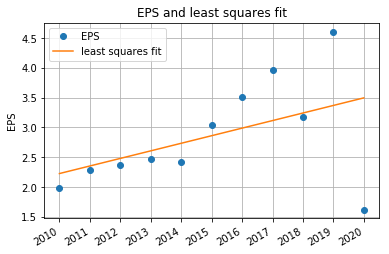

In [14]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('EPS')

ax1.plot(year_ended_list,EPS, 'o',label='EPS')
ax1.plot(year_ended_list,lstsq_fit, '-',label='least squares fit')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('EPS and least squares fit')
plt.show()

Using the equation for the best fit line, find the y value for the eps point at five years in the future.

In [15]:
# estimated eps in 5 years
eps_5yr_est = m*(x[-1]+5) + c
print('estimated eps in 5 years: {:.1f}'.format(eps_5yr_est))

estimated eps in 5 years: 4.1


Using the high and low price to earning ratio from above and the projected eps, calculate the range of stock price in five years.

In [16]:
#eps_5yr_est = 5  # user inputed value
print('estimated price range in 5 years: {:.2f} to {:.2f}'.format(eps_5yr_est*pe_avg_low,eps_5yr_est*pe_avg_high))

estimated price range in 5 years: 137.44 to 198.29


This is the estimated price range of the stock based on projected EPS and is a guide for what the stock price might be if conditions remain the same.  

Current stock price is \\$121.92 at the time of writing this report.

## 5) Format financial statements data <a id="section5"></a>
Generate a new data frame that holds the financial data needed for the DCF model.  Data from financial statements is copied into a spreadsheet which contains the data used in the analysis.  The data in the DCF_data tab is in a consistent format for ease of use by this notebook.  Standard names are used for the rows and columns.

In [17]:
#column names: fiscal years 
fy_data = df_financials.columns[1:].values.astype('datetime64[Y]')-1970
#line 0: Total revenue  
revenue_data = df_financials.iloc[0].to_numpy()[1:].astype('float')
#line 1: Cost of goods sold
Cost_of_goods_sold_data = df_financials.iloc[1].to_numpy()[1:].astype('float')
#line 2: General and administrative
General_and_administrative_data = df_financials.iloc[2].to_numpy()[1:].astype('float')
#line 3: Research and development
Research_and_development_data = df_financials.iloc[3].to_numpy()[1:].astype('float')
#line 4: Depreciation and amortization
Depreciation_and_amortization_data = df_financials.iloc[4].to_numpy()[1:].astype('float')
#line 5: Investment
Investment_data = df_financials.iloc[5].to_numpy()[1:].astype('float')
# line 6: Income before income taxes
Income_before_income_taxes_data = df_financials.iloc[6].to_numpy()[1:].astype('float')
# line 7: Income tax
Income_tax_data = df_financials.iloc[7].to_numpy()[1:].astype('float')
# line 8: Accounts receivable
Accounts_receivable_data = df_financials.iloc[8].to_numpy()[1:].astype('float')
# line 9: Inventories
Inventories_data = df_financials.iloc[9].to_numpy()[1:].astype('float')
# line 10: Accounts payable
Accounts_payable_data = df_financials.iloc[10].to_numpy()[1:].astype('float')
# line 11: Current assets
Current_assets_data = df_financials.iloc[11].to_numpy()[1:].astype('float')
# line 12: Current liabilities
Current_liabilities_data = df_financials.iloc[12].to_numpy()[1:].astype('float')
# line 13: Long term debt
Long_term_debt_data = df_financials.iloc[13].to_numpy()[1:].astype('float')
# line 14: Shares outstanding
Shares_outstanding_data = df_financials.iloc[14].to_numpy()[1:].astype('float')

In [18]:
# make a new data frame to store selected financial data
df_dcf_data = pd.DataFrame(data={
    'FY':fy_data[::-1],
    'revenue':revenue_data[::-1],
    'cost_of_goods_sold':Cost_of_goods_sold_data[::-1],
    'general_and_administrative':General_and_administrative_data[::-1],
    'research_and_development':Research_and_development_data[::-1],
    'depreciation':Depreciation_and_amortization_data[::-1],
    'investment':Investment_data[::-1],
    'income_before_income_taxes':Income_before_income_taxes_data[::-1],
    'income_tax':Income_tax_data[::-1],
    'accounts_receivable':Accounts_receivable_data[::-1],
    'inventories':Inventories_data[::-1],
    'accounts_payable':Accounts_payable_data[::-1], 
    'current_assets':Current_assets_data[::-1],
    'current_liabilities':Current_liabilities_data[::-1],
    'long_term_debt':Long_term_debt_data[::-1],
    'shares_outstanding':Shares_outstanding_data[::-1]
    })

#df_dcf_data

## 6) Discounted cash flow analysis, baseline <a id="section6"></a>
Discounted cash flow (DCF) is a valuation method used to estimate the value of an investment based on its expected future cash flows. DCF analysis attempts to figure out the value of an investment today, based on projections of how much money it will generate in the future. In finance, discounted cash flow (DCF) analysis is a method of valuing a security, project, company, or asset using the concepts of the time value of money. The DCF method used in this notebook follows [2].  

The value of any financial investment equals the present value of the expected future cash flows, discounted for risk and timing of these cash flows. The DCF method to value stocks is a four step process.  
1. Develop a set of future free cash flows for the corporation based on revenue growth, net operating profit margin, income tax rate and fix and working capital requirements.
2. Estimate the discount rate for the cash flows based on expected timing and risk.
3. Discount the cash flows and total them to calculate the value for the corporation as a whole.
4. Subtract the debt, preferred stock value and other claims and divide by the number of shares outstanding to get the intrinsic value.

Sections
- [Revenue growth rate](#section6-1) 
- [Net operating profit margin](#section6-2)
- [Tax rate](#section6-3)
- [Depreciation Rate](#section6-4)
- [Investment Rate](#section6-5)
- [Working Capital Rate](#section6-6)
- [Current Assets](#section6-7)
- [Current Liabilities](#section6-8)
- [Value of Debt Outstanding](#section6-9)
- [Current stock price](#section6-10)
- [Shares outstanding](#section6-11)
- [10 year treasury bond yield](#section6-12)
- [Bond yield spread to treasury](#section6-13)
- [Preferred stock yield](#section6-14)
- [Equity risk premium](#section6-15)
- [Company specific beta](#section6-16)
- [DCF model inputs](#section6-17)
- [Future cash flows](#section6-18)

### Revenue growth rate <a id="section6-1"></a>
The revenue growth rate (also sometimes called net sales) of the corporation plus any other revenues associated with the main operations of the business. It does not include dividends, interest income or non-operating income. Historic revenue data is obtained from consolidated income statements. The year over year change in revenue is calculated and converted to a percent, then an average revenue growth rate is calculated. 

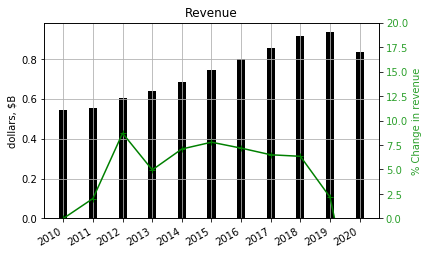

In [19]:
# calculate the percent change in revenue
pcr = np.zeros(len(df_dcf_data['revenue'].to_numpy())) # percent change in revenue
for i in range(len(df_dcf_data['revenue'].to_numpy()[0:-1])):
    pcr[i+1] = ((df_dcf_data['revenue'].to_numpy()[i+1] - df_dcf_data['revenue'].to_numpy()[i])/
                df_dcf_data['revenue'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['revenue']/1e9, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcr,'+-g')
    
ax2.set_ylabel('% Change in revenue',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Revenue')
plt.show()

**Observation:**  
Revenue over the last ten years has been growing, except for 2020.  

In [20]:
rgr_avg = pcr[2:].mean()/100
print('average revenue growth rate: {:.2f}%'.format(rgr_avg*100))

average revenue growth rate: 4.31%


### Net operating profit margin <a id="section6-2"></a>
Net Operating Profit should reflect the future revenue generating ability and expense requirements of the operating business that comprise the ongoing operations of the company.

$\text{NOPM} = \frac{\text{Revenue} - \text{Expenses}}{\text{Revenue}}$  
 
$\text{Expenses} = \text{Cost of Goods Sold (CGS)} + \text{General and Administrative (G&A)} + \text{Research and Development (R&D)}$

General and Administrative (G&A) is also called Sales, General and Administrative (SG&A)

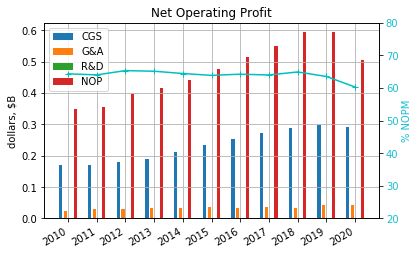

In [21]:
# NOP = (Revenue - Expenses)
nop = (df_dcf_data['revenue'].to_numpy() - \
    (df_dcf_data['cost_of_goods_sold'].to_numpy() + \
    df_dcf_data['general_and_administrative'].to_numpy() + \
    df_dcf_data['research_and_development'].to_numpy()) )

# net operating profit margin as percent of revenue
nopm = nop/df_dcf_data['revenue'].to_numpy()

# plot as four grouped bar chart with labels on right and working capital rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
x3_bar_position = []
x4_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=3))
    x2_bar_position.append(i-relativedelta(months=1))
    x3_bar_position.append(i+relativedelta(months=1))
    x4_bar_position.append(i+relativedelta(months=3))
    
width = 40  # the width of the bars
    
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

ax1.bar(x1_bar_position,df_dcf_data['cost_of_goods_sold'].to_numpy()/1e9, width,label='CGS')
ax1.bar(x2_bar_position,df_dcf_data['general_and_administrative'].to_numpy()/1e9, width,label='G&A')
ax1.bar(x3_bar_position,df_dcf_data['research_and_development'].to_numpy()/1e9, width,label='R&D')
ax1.bar(x4_bar_position,nop/1e9, width,label='NOP')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:cyan'

ax2.plot(df_dcf_data['FY'],nopm*100,'+-c')
    
ax2.set_ylabel('% NOPM',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((20,80))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Net Operating Profit')
plt.show()

**Observation**  
The NOPM has been steady over the years 2010 to 2018, but for 2019 and 2020 a decline.

Calculate the average net operating profit margin for the last 5 years.  

In [22]:
#Average net operating profit margin
nopm_avg = nopm[-5:].mean()
print('average net operating profit margin: {:.2f}%'.format(nopm_avg*100))

average net operating profit margin: 63.36%


### Tax rate <a id="section6-3"></a>
Tax payments are taken from the consolidated income statement, provision for income taxes.  The effect of taxes on profits is accounted for. 

$\text{Tax rate} = \frac{\text{Income taxes}}{\text{Income before income taxes}}$

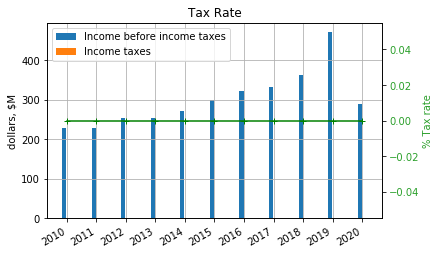

In [23]:
# plot as Grouped bar chart with labels on right and tax rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=1))
    x2_bar_position.append(i+relativedelta(months=1))

# calculate tax rate
tax_rate = df_dcf_data['income_tax']/df_dcf_data['income_before_income_taxes']

width = 50  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$M')

rects1 = ax1.bar(x1_bar_position,df_dcf_data['income_before_income_taxes']/1e6, width,
    label='Income before income taxes')
rects2 = ax1.bar(x2_bar_position,df_dcf_data['income_tax']/1e6, width,
    label='Income taxes')

ax1.tick_params(axis='y')
#ax1.set_ylim((-2e3,2e3))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],tax_rate * 100,'+-g')
    
ax2.set_ylabel('% Tax rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((0,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Tax Rate')
plt.show()

**Observations**:  
Tax rate for REIT is usually near zero.

In [24]:
# Average tax rate
tax_rate_avg = 0 #tax_rate.mean()
print('average tax rate: {:.2f}%'.format(tax_rate_avg*100))

average tax rate: 0.00%


### Depreciation Rate <a id="section6-4"></a>
The depreciation rate is used to project the future net investment cash flows.  The effect is to reduce the amount of FCFF. Depreciation amounts are from the Consolidated Statement of Cash Flows, Depreciation and Amortization.  

$\text{Depreciation Rate}=\frac{\text{Depreciation and Amortization}}{\text{Revenues}}$

Depreciation is the write off or expensing of a percentage of the historical cost of an asset over the asset's useful life.  Property, plant and equipment (PP&E) are long term or non current assets owned or controlled by the company and used to manufacture and or sell the company's products.  The balance sheet typically shows all categories of PP&E grouped together, net of accumulated depreciation.  Depreciation represents wear and tear on an asset or the fact that an asset gets used up over time.  Companies record depreciation expense in the income statement every year for all depreciable assets in service or used by the company during the year.  The difference between GAAP and Tax Accounting methods is handled through deferred taxes.

Amortization is the write off or expensing of the cost of a financial instrument or an intangible asset over the shorter of its useful life or legal life.  Amortization is similar to depreciation and reflects the declining useful life and value of the intangible asset over time.  Companies in research and development intensive fields typically have many patents.  Such industries include high technology, pharmaceuticals and chemicals. 

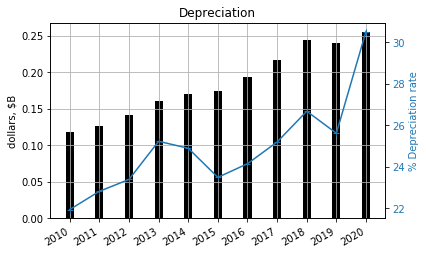

In [25]:
# depreciation rate
depreciation_rate = df_dcf_data['depreciation'] / df_dcf_data['revenue'].to_numpy()

# plot depreciation on left and rate on right
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

ax1.bar(df_dcf_data['FY'],df_dcf_data['depreciation']/1e9, width=100,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],depreciation_rate*100,'+-')
    
ax2.set_ylabel('% Depreciation rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((0,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Depreciation')
plt.show()

**Observations**:  
The depreciation rate has been increasing over the years.  

In [26]:
# average depreciation rate
depreciation_rate_avg = depreciation_rate[2:].mean()
print('average depreciation rate: {:.2f}%'.format(depreciation_rate_avg*100))

average depreciation rate: 25.47%


### Investment Rate <a id="section6-5"></a>
Taken from Consolidated Statement of Cash Flows, Cash used for investing activities.  Net investment in the dollar amount needed to support the growth of the firm. Included investments in properties, plant equipment in excess of the depreciation expenses associated with past investments.  Net investment decreases the amount of money available to the stockholders. Investment in property, plant and equipment is necessary to both maintain service and sales and also to grow revenues and profits. Investment amounts should include capital expenditures and research and development. 

$Ir=\frac {\text {Capital Expenditures}}{\text{Revenues}}$ 

For this company, the yearly investment amounts are taken from the Consolidated Statements of Cash Flows, 
Net Cash Used in Investing Activities.

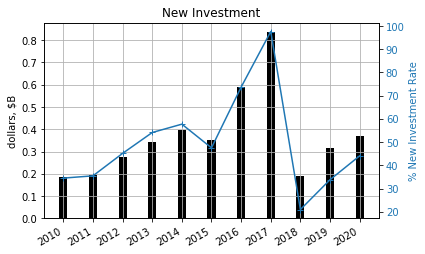

In [27]:
# investment rate
investment_rate = df_dcf_data['investment'] / df_dcf_data['revenue'].to_numpy()

# plot investment on left and rate on right
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$B')

ax1.bar(df_dcf_data['FY'],df_dcf_data['investment']/1e9, width=100,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],investment_rate*100,'+-')
    
ax2.set_ylabel('% New Investment Rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((0,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('New Investment')
plt.show()

**Observations**:  
The funds used for new investments has been variable over the years.  

In [28]:
# average investment rate
investment_rate_avg = investment_rate.mean()
print('average investment rate: {:.2f}%'.format(investment_rate_avg*100))

average investment rate: 49.53%


### Working Capital Rate <a id="section6-6"></a>
Working capital is needed to support the corporate sales effort of any company.  Often a company’s incremental change in net working capital either positive or negative is approximately proportional to its change in revenue.

$\text{Working capital} = \text{Accounts Receivable} + \text{Inventories} - \text{Accounts Payable}$  

Working capital is a company’s net investment in its accounts receivable and its inventories (cash outflows), minus its accounts payable (a cash inflow).  Working capital and taxes are cash outflows from the corporation that are not available to pay debts and stockholders.


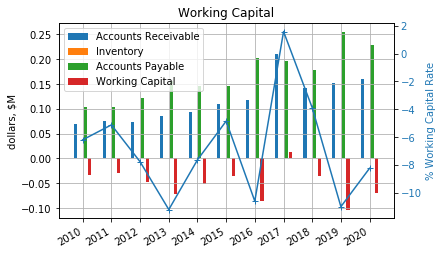

In [29]:
# plot as four grouped bar chart with labels on right and working capital rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
x3_bar_position = []
x4_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=3))
    x2_bar_position.append(i-relativedelta(months=1))
    x3_bar_position.append(i+relativedelta(months=1))
    x4_bar_position.append(i+relativedelta(months=3))

# calculate working capital rate
working_capital = (df_dcf_data['accounts_receivable'] + df_dcf_data['inventories']) - \
    df_dcf_data['accounts_payable']
working_capital_rate = working_capital / df_dcf_data['revenue']

width = 40  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$M')

rects1 = ax1.bar(x1_bar_position,df_dcf_data['accounts_receivable']/1e9, width,\
    label='Accounts Receivable')
rects2 = ax1.bar(x2_bar_position,df_dcf_data['inventories']/1e9, width, label='Inventory')

rects2 = ax1.bar(x3_bar_position,df_dcf_data['accounts_payable']/1e9, width, label='Accounts Payable')
rects2 = ax1.bar(x4_bar_position,working_capital/1e9, width, label='Working Capital')

ax1.tick_params(axis='y')
#ax1.set_ylim((-50,200))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],working_capital_rate * 100,'+-')
    
ax2.set_ylabel('% Working Capital Rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,5))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Working Capital')
plt.show()

**Observations:**  
The company has a negative working capital rate. Negative working capital describes a situation where a company's current liabilities exceed its current assets as stated on the firm's balance sheet. In other words, there is more short-term debt than there are short-term assets. 

Negative working capital most often arises when a business generates cash very quickly because it can sell products to its customers before it has to pay the bills to its vendors for the original goods or raw materials. In this way, the company is effectively using the vendor's money to grow. 

For a REIT, the working capital rate is set to zero.

In [30]:
# average working capital rate
working_capital_rate_avg = 0 # working_capital_rate[-5:].mean()
print('average working capital rate: {:.2f}%'.format(working_capital_rate_avg*100))

average working capital rate: 0.00%


### Current assets <a id="section6-7"></a>
Total Current Assets from the most recent balance sheet statement of the company.  Current assets include inventory, cash and accounts receivables.

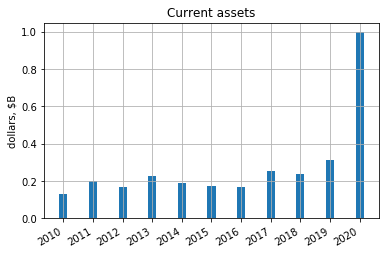

In [31]:
# plot Short Term Assets
width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],df_dcf_data['current_assets']/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Current assets')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

**Observations:**  
Cash and cash equivalents increased to \\$798,329 from \\$127,432 the prior year.  The company took actions to raise money to ride out covid's effect on the rental market.  

Throughout the last three quarters of 2020, the company maintained levels of cash significantly in excess of the cash balances they have historically maintained which has adversely impacted our financial results.  They believe that such action was prudent to position them with what they expect to be sufficient liquidity to allow them to continue fully
operating until their operating revenues return to more typical levels. 

Those actions included raising \\$1.1 billion in May 2020 through a \\$400.0 million term loan and the issuance of \\$700.0 million of senior unsecured notes, amending the covenants on our revolving credit facility to provide them operating flexibility during the expected period during which their cash flow will be impacted, and raising an additional \\$400.0 million of senior unsecured notes in October 2020. 

As of December 31, 2020, there is no outstanding balance on their \\$1.0 billion revolving credit facility, and they have cash and cash equivalents of \\$798.3 million.

In [32]:
sta = df_dcf_data['current_assets'].iloc[-1]
print('Current assets: ${:.2f}B'.format(sta/1e9))

Current assets: $1.00B


### Current liabilities <a id="section6-8"></a>
Total Current Liabilities from the most recent balance sheet consolidated statement.

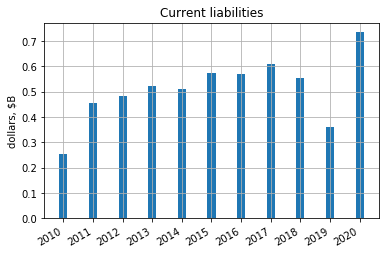

In [33]:
# plot Short Term Liabilities

width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],df_dcf_data['current_liabilities']/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Current liabilities')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

In [34]:
print('Average of current liabilities: ${:.2f}B'.format(df_dcf_data['current_liabilities'].mean()/1e9))

Average of current liabilities: $0.51B


**Observations**:  
Senior notes and debentures, net increased to \\$3,404,488 from \\$2,807,134.

In [35]:
stl = df_dcf_data['current_liabilities'].iloc[-1]
print('Current liabilities: ${:.2f}B'.format(stl/1e9))

Current liabilities: $0.74B


### Value of Debt Outstanding <a id="section6-9"></a>
Amount of debt outstanding from the most recent balance sheet of the company.


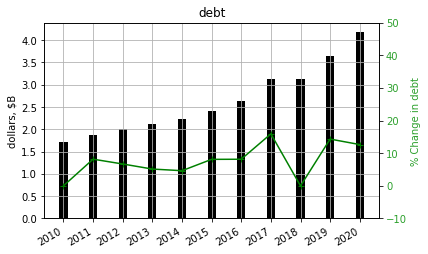

In [36]:
# calculate the percent change in debt, pcd
pcd = np.zeros(len(df_dcf_data['long_term_debt'].to_numpy())) # percent change in debt
for i in range(len(df_dcf_data['long_term_debt'].to_numpy()[0:-1])):
    pcd[i+1] = ((df_dcf_data['long_term_debt'].to_numpy()[i+1] - df_dcf_data['long_term_debt'].to_numpy()[i])/
                df_dcf_data['long_term_debt'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['long_term_debt']/1e9, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcd,'+-g')
    
ax2.set_ylabel('% Change in debt',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-10,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('debt')
plt.show()

In [37]:
dgr_avg = pcr[1:].mean()/100
print('average debt growth rate: {:.2f}%'.format(dgr_avg*100))

average debt growth rate: 4.08%


**Observations:**  
Senior notes and debentures increased in 2019 to 2,807,134 from 2,404,279 in 2018. 

On June 7, 2019, the company issued \\$300.0 million of fixed rate senior unsecured notes that mature on June 15, 2029 and bear interest at 3.20%. On August 21, 2019, they issued an additional \\$100.0 million senior notes of the same series and with the same terms.

In [38]:
vod = df_dcf_data['long_term_debt'].iloc[-1]
print('Total long term debt and other: ${:.2f}B'.format(vod/1e9))

Total long term debt and other: $4.19B


### Current stock price <a id="section6-10"></a>
Most recent stock price for the [company](https://finance.yahoo.com/quote/T/?p=T).  The current stock price is used to calculate the market value of the firm. Use the market value when looking at market capitalization for common stock. 

In [39]:
csp = 121.92 # current stock price, $
print('current stock price: ${:,.2f}'.format(csp))

current stock price: $121.92


### Shares outstanding <a id="section6-11"></a>
The number of shares outstanding is used to calculate the intrinsic stock value.  


In [40]:
so = df_dcf_data['shares_outstanding'].iloc[-1]               # shares outstanding
print('shares_outstanding, basic: {:,.0f}'.format(so))

shares_outstanding, basic: 75,515,000


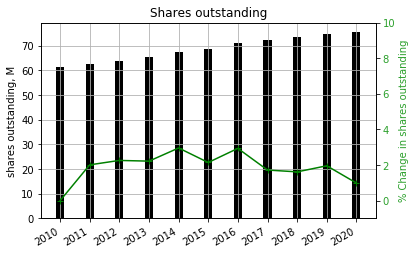

In [41]:
# calculate the percent change in shares outstanding, pcso
pcso = np.zeros(len(df_dcf_data['shares_outstanding'].to_numpy())) # percent change in debt
for i in range(len(df_dcf_data['shares_outstanding'].to_numpy()[0:-1])):
    pcso[i+1] = ((df_dcf_data['shares_outstanding'].to_numpy()[i+1] - df_dcf_data['shares_outstanding'].to_numpy()[i])/
                df_dcf_data['shares_outstanding'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('shares outstanding, M')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['shares_outstanding']/1e6, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcso,'+-g')
    
ax2.set_ylabel('% Change in shares outstanding',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-1,10))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Shares outstanding')
plt.show()

In [42]:
print('average shares outstanding growth rate: {:.2f}%'.format(pcso[1:].mean()))

average shares outstanding growth rate: 2.08%


**Observation:**  
The basic share outstanding have been increasing at a small rate.

### 10 year treasury bond yield <a id="section6-12"></a>
The [10 year treasury yield](https://finance.yahoo.com/quote/%5ETNX?p=^TNX&.tsrc=fin-srch) is used as a measure of the risk free rate.   

In [43]:
tby = 1.38/100             # 10 year treasury bond yield
print('10 year treasury bond yield: {:,.2f}%'.format(tby*100))

10 year treasury bond yield: 1.38%


### Bond yield spread to treasury <a id="section6-13"></a>
The spread to treasury implies that all corporate debt will have a higher yield than yields associated with comparable maturity US Treasury Bonds.  The best way to determine default risk is to see how a particular company's debt is trading in the market and compare it on a spread basis with comparable maturity yields.  

Look at [PIMCO Active Bond Exchange-Traded Fund (BOND)](https://finance.yahoo.com/quote/BOND?p=BOND) or use a default rating systems that are published by the three major rating agencies, Standards and Poors Corp, Moody’s Investor Services and Fitch & Company.

Web resources:
- http://www.standardpoor.com/  
- http://bond.yahoo.com/rates.html  
- http://www.moodys.com/cust/default.asp  
- http://www.fitchibca.com/corporate/index.cfm  

In [44]:
bystt = (2.53-1.38)/100           # bond yield spread to treasury spread
print('Bond yield spread to treasury: {:,.2f}%'.format(bystt*100))

Bond yield spread to treasury: 1.15%


### Preferred stock yield <a id="section6-14"></a>
Amount of preferred stock outstanding from the most recent balance sheet of the company.

From the balance sheet:  
- Preferred shares, authorized 15,000,000 shares, \\$.01 par: 5.0% Series C Cumulative Redeemable Preferred Shares, (stated at liquidation preference $25,000 per share), 6,000 shares issued and outstanding
- 5.417% Series 1 Cumulative Convertible Preferred Shares, (stated at liquidation preference \\$25 per share), 399,896 shares issued and outstanding

See below for inputs to model.

In [45]:
psay = (5+5.417)/2 # preferred stock average yield 
psy = psay/100  # preferred stock yield
print('preferred stock yield: {:,.2f}%'.format(psy*100))

vps = 6000*25000 + 399896*25 # value of preferred stock
print('value of preferred stock: {:,.2f}'.format(vps))

preferred stock yield: 5.21%
value of preferred stock: 159,997,400.00


### Equity risk premium <a id="section6-15"></a>
The expected excess return a hypothetical average investor would require of a diversified portfolio of stock (assumed beta = 1.0) over the yield on the 10-year Treasury Bond.  The equity risk premium has been going down over the years.  
- 1926 to 1990: 5.5%   
- 1962 to 1990: 3.25%   
- 1981 to 1990: 0.19%   

In times of sustained economic growth the risk premium demanded by investors generally declines.   

I'm going to use 3% as the equity risk premium.

In [46]:
eq_rp = 3.0/100             # equity risk premium
print('Equity risk premium: {:,.2f}%'.format(eq_rp*100))

Equity risk premium: 3.00%


### Company specific beta <a id="section6-16"></a>
The Beta used is Beta of Equity. Beta is the monthly price change of a particular company relative to the monthly price change of the S&P 500. The time period for Beta is 5 years when available. This value can be obtained at [yahoo finance](https://finance.yahoo.com/quote/ED/?p=ED).  

A measure of risk of an individual stock. It measures volatility of return - a higher beta means a higher risk. A financial model that uses Beta as its sole measure of risk (signal factor model) is called a Capital Asset Pricing Model (CAPM).
 

In [47]:
beta = 1.15 # company specific beta
print('Company specific beta: {:,.2f}'.format(beta))

Company specific beta: 1.15


### DCF model inputs <a id="section6-17"></a>
Below are the DCF model inputs.  These values were calculated above.

In [48]:
# various rates
rgr = rgr_avg              # revenue growth rate
print('revenue growth rate: {:,.2f}%'.format(rgr*100))
nopm = nopm_avg             # net operating profit margin
print('net operating profit margin: {:,.2f}%'.format(nopm*100))
tr = tax_rate_avg               # tax rate
print('tax rate: {:,.2f}%'.format(tr*100))
dr = depreciation_rate_avg              # depreciation rate (% of revenue)
print('depreciation rate: {:,.2f}%'.format(dr*100))
ir = investment_rate_avg              # investment rate (% of revenue)
print('investment rate: {:,.2f}%'.format(ir*100))
wcr = working_capital_rate_avg            # working capital rate (% of revenue)
print('working capital rate: {:,.2f}%'.format(wcr*100))

revenue growth rate: 4.31%
net operating profit margin: 63.36%
tax rate: 0.00%
depreciation rate: 25.47%
investment rate: 49.53%
working capital rate: 0.00%


In [49]:
# General Inputs
fy_start = df_dcf_data['FY'].iloc[-1].year # fiscal year to start excess return period
erp = 10                  # excess return period, years
rev_start = df_dcf_data['revenue'].to_numpy()[-1] # starting revenues for excess return period
print('starting revenues: ${:,.2f}B'.format(rev_start/1e9))
print('shares outstanding: {:,.0f}'.format(so))

starting revenues: $0.84B
shares outstanding: 75,515,000


In [50]:
ps_mv = vps               # preferred stock, market value 
print('preferred stock, market value : ${:,.2f}B'.format(ps_mv/1e9))
cs_mv = csp*so            # common stock, market value 
print('common stock, market value: ${:,.2f}B'.format(cs_mv/1e9))

preferred stock, market value : $0.16B
common stock, market value: $9.21B


**Long Term Debt, Market Value, ltd_mv**  
Use the book value for long term debt.  Various online resources can be used to research this item.
These include, [Bondsonline](http://www.bondsonline.com/) and [Bloomberg](http://www.bloomberg.com/).  The book value of debt and preferred stock is an accounting measure that relates to how much money was raised by the company when each security was issued.  The market value of debt and the preferred and common stock is the price that specific obligations would trade at in today’s market. 

Long term debt for firms can take one of two forms.  It can be a long-term loan from a bank or other financial institution or it can be a long-term bond issued to financial markets, in which case the creditors are the investors in the bond.  Firms often have long term obligations that are not captured in the long term debt item.  These include obligations to lessors on assets that firms have leased, to employees in the form of pension fund and health care benefits yet to be paid, and to the government in the form of taxes deferred.  In the last two decades, accountants have increasingly moved towards quantifying these liabilities and showing them as long term liabilities.

In [51]:
ltd_mv = vod              # market value of long term debt
tmv = ltd_mv+ps_mv+cs_mv  # total market value 
print('total market value: ${:,.2f}B'.format(tmv/1e9))

total market value: $13.55B


**Cost of Common Equity, cce**  
The expected excess return a hypothetical average investor would require of a diversified portfolio of stock (assumed beta = 1.0) over the yield on the 10-year Treasury Bond.  The annual rate of return that an investor expects to earn when investing in shares of a company is known as the cost of common equity.  It includes dividends and increases in the market value.

In [52]:
cce = tby+beta*eq_rp      # cost of common equity or the expected return for the stock
print('cost of common equity: {:,.2f}%'.format(cce*100))

cost of common equity: 4.83%


**Long Term Debt, Average Yield, ltd_ay**  
The total cost of long term debt.

In [53]:
ltd_ay = tby+bystt        # long term debt average yield
print('long term debt average yield: {:,.2f}%'.format(ltd_ay*100))

long term debt average yield: 2.53%


**Long Term Debt, After Tax Yield, ltd_aty**  
The tax benefits of long term debt.  Interest payments are tax deductible for the company.

In [54]:
ltd_aty = ltd_ay*(1-tr)   # long term debt after tax yield
print('long term debt after tax yield: {:,.2f}%'.format(ltd_aty*100))

ltd_pc = vod/tmv          # weight for long term debt 
ltd_ate = ltd_aty*ltd_pc  # after tax effect of long term debt 
ps_ay = psy               # preferred stock, average yield 
ps_aty = ps_ay            # preferred stock, average yield 
print('preferred stock, average yield: {:,.2f}%'.format(ps_aty*100))

ps_pc = ps_mv/tmv         # preferred stock, % capital 
ps_ate = ps_aty*ps_pc     # preferred stock, after tax effect 
cs_ay = cce               # common stock, average yield 
cs_aty = cce              # common stock, after tax yield 
print('common stock, after tax yield: {:,.2f}%'.format(cs_aty*100))

cs_pc = cs_mv/tmv         # common stock, % capital 
cs_ate = cs_aty*cs_pc     # common stock, after tax effect 
print('common stock, after tax effet: {:,.2f}%'.format(cs_ate*100))

tate = ltd_ate+ps_ate+cs_ate # total after tax effect 
print('total after tax effect: {:,.2f}%'.format(tate*100))
tpc = ltd_pc+ps_pc+cs_pc     # total % Capital
print('total % Capital: {:,.2f}%'.format(tpc*100))

long term debt after tax yield: 2.53%
preferred stock, average yield: 5.21%
common stock, after tax yield: 4.83%
common stock, after tax effet: 3.28%
total after tax effect: 4.12%
total % Capital: 100.00%


**Weighted average cost of capital**  
A company's weighted average cost of capital (WACC) is the weighted average of the company's current cost of debt and equity calculated by using current debt, preferred stock and common stock market values.  The WACC of the company, calculated after tax, is the discount rate used in the DCF valuation procedures. The WACC, which is the cost of the different components of financing used by the firm, weighted by their market value proportions.  These include debt, preferred stock, and common stock.

WACC: Weighted Average Cost of Capital, the rate used to discount cash flows, based on the following three factors.
1. Base rate of return.
2. Expected return based on debt and preferred stock.
3. Expected return on common stock and Beta.

All adjusted for the tax advantage of interest payments and the percentage of debt, preferred stock and common stock.

In [55]:
wacc = tate
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

weighted average cost of capital: 4.1%


### Future cash flows <a id="section6-18"></a>
The future cash flows to the firm are projected based on revenue growth.  The cash flows are then discounted using the WACC and the ISV is calculated.

In [56]:
# make a list of the fiscal years in excess return period 
fy = np.zeros(erp+1)
fy[0] = fy_start
for i in range(1,erp+1): 
    fy[i]=fy_start+i

rev = np.zeros(len(fy))
ciwc = np.zeros(len(fy))
rev[0] = rev_start  #*rgr+rev_start   # find the future revenue using constant revenue growth rate 

for i in range(1,len(fy)): 
    rev[i] = rev[i-1]*rgr+rev[i-1]  # find the future revenue 
    ciwc[i] = (rev[i]-rev[i-1])*wcr  # find the change in working capital 

nop = np.zeros(len(fy))
adj_taxes = np.zeros(len(fy))
nopat = np.zeros(len(fy))
invest = np.zeros(len(fy))
depre = np.zeros(len(fy))
net_invest = np.zeros(len(fy))
fcff = np.zeros(len(fy))
disc_fact = np.zeros(len(fy))
disc_fcff = np.zeros(len(fy))                

# calculate values in table 
for i in range(1,len(fy)): 
    nop[i] = rev[i]*nopm # net operating profit
    adj_taxes[i] = nop[i]*tr # net operating profit adjusted for taxes
    nopat[i] = nop[i]-adj_taxes[i] # after tax net operating profit
    invest[i] = rev[i]*ir # future investments
    depre[i] = rev[i]*dr # future depreciations
    net_invest[i] = invest[i]-depre[i] # net investments
    fcff[i] = nopat[i]-net_invest[i]-ciwc[i] # free cash flow to the firm
    disc_fact[i] = 1/((1+wacc)**i) # discount factor
    disc_fcff[i] = disc_fact[i]*fcff[i] # discounted free cash flow to the firm
    
dcrv = nopat[-1]/wacc*disc_fact[-1] # discounted corporate residual value
derp_fcff = disc_fcff.sum() # discounted excess return period FCFF

tcv = derp_fcff+dcrv+sta # total corporate value
tvce = tcv-vod-vps-stl # total value of common equity
isv = tvce/so # intrinsic stock value

# print cash flows in a table
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('year','rev','nop','at',
    'nopat','invest','depre','ci','ciwc','FCFF','disc','dFCFF'))
for i in range(len(fy)):
    print('{:4.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.4f}{:10,.0f}'.format(fy[i],
        rev[i]/1e6,nop[i]/1e6,adj_taxes[i]/1e6,nopat[i]/1e6,invest[i]/1e6,depre[i]/1e6,(invest[i]-depre[i])/1e6,ciwc[i]/1e6,
        fcff[i]/1e6,disc_fact[i],disc_fcff[i]/1e6))

year       rev       nop        at     nopat    invest     depre        ci      ciwc      FCFF      disc     dFCFF
2020       835         0         0         0         0         0         0         0         0    0.0000         0
2021       871       552         0       552       432       222       210         0       343    0.9604       329
2022       909       576         0       576       450       231       219         0       357    0.9224       330
2023       948       601         0       601       470       241       228         0       373    0.8858       330
2024       989       627         0       627       490       252       238         0       389    0.8507       331
2025     1,032       654         0       654       511       263       248         0       405    0.8170       331
2026     1,076       682         0       682       533       274       259         0       423    0.7847       332
2027     1,122       711         0       711       556       286       270      

In [57]:
# Intrinsic Value
print('discounted excess return period FCFF: ${:,.2f}B'.format(derp_fcff/1e9))
print('discounted corporate residual value: ${:,.2f}B'.format(dcrv/1e9))
print('total corporate value: ${:,.2f}B'.format(tcv/1e9))
print('total value of common equity: ${:,.2f}B'.format(tvce/1e9))
print('intrinsic stock value: ${:,.2f}'.format(isv))
print('current stock price: ${:,.2f}'.format(csp))

discounted excess return period FCFF: $3.32B
discounted corporate residual value: $13.06B
total corporate value: $17.38B
total value of common equity: $12.29B
intrinsic stock value: $162.81
current stock price: $121.92


**Observations:**  
The base line DCF analysis produces an intrinsic stock value of \\$165.72.

The calculations used here can be verified by using the [Valuepro](http://www.valuepro.net/index.shtml) web site, which calculates ISV based on the same method.


## 7) DCF Scenarios <a id="section7"></a>
Adjusting the weighted average cost of capital to 8.0% to reflect possible higher interest and inflation in the future and changing the revenue growth rate to a modest 3.00%.

In [58]:
wacc = 0.08 # weighted average cost of capital
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

rgr = 0.03  # revenue growth rate
print('revenue growth rate: {:,.2f}%'.format(rgr*100))

#nopm = 0.03             # net operating profit margin
#print('net operating profit margin: {:,.2f}%'.format(nopm*100))

weighted average cost of capital: 8.0%
revenue growth rate: 3.00%


In [59]:
# make a list of the fiscal years in excess return period 
fy = np.zeros(erp+1)
fy[0] = fy_start
for i in range(1,erp+1): 
    fy[i]=fy_start+i

rev = np.zeros(len(fy))
ciwc = np.zeros(len(fy))
rev[0] = rev_start  #*rgr+rev_start   # find the future revenue using constant revenue growth rate 

for i in range(1,len(fy)): 
    rev[i] = rev[i-1]*rgr+rev[i-1]  # find the future revenue 
    ciwc[i] = (rev[i]-rev[i-1])*wcr  # find the change in working capital 

nop = np.zeros(len(fy))
adj_taxes = np.zeros(len(fy))
nopat = np.zeros(len(fy))
invest = np.zeros(len(fy))
depre = np.zeros(len(fy))
net_invest = np.zeros(len(fy))
fcff = np.zeros(len(fy))
disc_fact = np.zeros(len(fy))
disc_fcff = np.zeros(len(fy))                

# calculate values in table 
for i in range(1,len(fy)): 
    nop[i] = rev[i]*nopm # net operating profit
    adj_taxes[i] = nop[i]*tr # net operating profit adjusted for taxes
    nopat[i] = nop[i]-adj_taxes[i] # after tax net operating profit
    invest[i] = rev[i]*ir # future investments
    depre[i] = rev[i]*dr # future depreciations
    net_invest[i] = invest[i]-depre[i] # net investments
    fcff[i] = nopat[i]-net_invest[i]-ciwc[i] # free cash flow to the firm
    disc_fact[i] = 1/((1+wacc)**i) # discount factor
    disc_fcff[i] = disc_fact[i]*fcff[i] # discounted free cash flow to the firm
    
dcrv = nopat[-1]/wacc*disc_fact[-1] # discounted corporate residual value
derp_fcff = disc_fcff.sum() # discounted excess return period FCFF

tcv = derp_fcff+dcrv+sta # total corporate value
tvce = tcv-vod-vps-stl # total value of common equity
isv = tvce/so # intrinsic stock value

# print cash flows in a table
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('year','rev','nop','at',
    'nopat','invest','depre','ci','ciwc','FCFF','disc','dFCFF'))
for i in range(len(fy)):
    print('{:4.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.4f}{:10,.0f}'.format(fy[i],
        rev[i]/1e6,nop[i]/1e6,adj_taxes[i]/1e6,nopat[i]/1e6,invest[i]/1e6,depre[i]/1e6,(invest[i]-depre[i])/1e6,ciwc[i]/1e6,
        fcff[i]/1e6,disc_fact[i],disc_fcff[i]/1e6))

year       rev       nop        at     nopat    invest     depre        ci      ciwc      FCFF      disc     dFCFF
2020       835         0         0         0         0         0         0         0         0    0.0000         0
2021       861       545         0       545       426       219       207         0       338    0.9259       313
2022       886       562         0       562       439       226       213         0       348    0.8573       299
2023       913       578         0       578       452       232       220         0       359    0.7938       285
2024       940       596         0       596       466       239       226         0       370    0.7350       272
2025       969       614         0       614       480       247       233         0       381    0.6806       259
2026       998       632         0       632       494       254       240         0       392    0.6302       247
2027     1,028       651         0       651       509       262       247      

In [60]:
# Intrinsic Value
print('discounted excess return period FCFF: ${:,.2f}B'.format(derp_fcff/1e9))
print('discounted corporate residual value: ${:,.2f}B'.format(dcrv/1e9))
print('total corporate value: ${:,.2f}B'.format(tcv/1e9))
print('total value of common equity: ${:,.2f}B'.format(tvce/1e9))
print('intrinsic stock value: ${:,.2f}'.format(isv))

discounted excess return period FCFF: $2.55B
discounted corporate residual value: $4.12B
total corporate value: $7.67B
total value of common equity: $2.59B
intrinsic stock value: $34.30


The DCF model calculates with adjustments an intrinsic stock value of \\$36. This is about 70% of the current price of \\$52.30. There is no safety margin when considering future inflation and higher interest rates.

### 8) Dividend Discount Model <a id="section8"></a>
In this section I look at the dividends paid as a series of cash flows. The historical dividends are plotted below and the average growth in dividend payments are calculated.    

Since a dividend stock is primarily purchased for the stream of dividends, the present value and internal rate of return of the cash flows can be calculated. 

In [61]:
#column names: fiscal years 
years_list = df_metrics.columns[1:].values.astype('str')[::-1]

# convert years to datetime format
year_ended_list = []
for i in years_list:
    year_ended_list.append(datetime.strptime(i, '%Y'))

In [62]:
#line 8: Dividends per share  
dps = df_metrics.iloc[8].to_numpy()[1:].astype('float')[::-1]

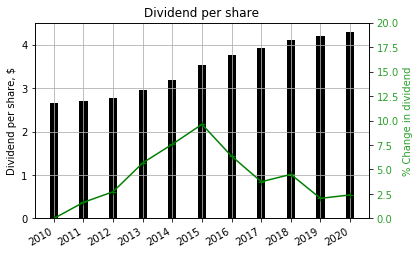

In [63]:
# calculate the percent change in dividends
pcd = np.zeros(len(dps)) # percent change in dividend
for i in range(len(dps[0:-1])):
    pcd[i+1] = ((dps[i+1] - dps[i])/
                dps[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Dividend per share, $')

# plot revenue as single bar
plt.bar(year_ended_list,dps, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(year_ended_list,pcd,'+-g')
    
ax2.set_ylabel('% Change in dividend',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Dividend per share')
plt.show()

In [64]:
adgr = pcd[1:].mean()
print('average dividend growth rate: {:.2f}%'.format(adgr))

average dividend growth rate: 4.63%


### Future dividend estimate
Using the average dividend growth rate calculated above, a series of estimated future dividend payments are generated. 

In [65]:
fdp = np.zeros(len(dps)) # future dividend payments
fdp[0] = dps[-1]
for i in range(len(dps[0:-1])):
    fdp[i+1] = fdp[i]+fdp[i]*adgr/100

### Net Present Value (NPV) calculation
Using the series of estimated future dividend payments and including the stock purchase price and the final sale price, the NPV is calculated using the discount rate. In the case when all future cash flows are positive, the only outflow of cash is the purchase price, the NPV is simply the PV of future cash flows minus the purchase price.

As seen elsewhere in this report, the company's stock price is not growing with revenues or earnings. I would expect that over the long term, the share price would rise as investors see the value in the company. For the NPV analysis presented here, I will assume that the final stock price is equal to the current stock price and this amount is added to the final dividend payment.  

In [66]:
#csp = 23.81 # current stock price, $
print('current stock price: ${:,.2f}'.format(csp))

fsp = csp # final stock price, $
print('final stock price: ${:,.2f}'.format(fsp))

current stock price: $121.92
final stock price: $121.92


In [67]:
est_cf = np.copy(fdp) # make a copy of the estimated cash flow

# cash flows, initial purchase, dividend payments and final sale
est_cf[0] = est_cf[0] - csp # subtract purchase price from the first dividend payment
est_cf[-1] = est_cf[-1] + fsp # include the sale price with the final dividend payment

The discount rate used in the NPV calculation is the rate of return that I would currently expect a safe investment such as an investment grade corporate bond. This can be the current rate or an estimated future rate.  

In [68]:
dr = 3/100 # discount rate
print('net present value of cash flows: ${:.2f}'.format(np.npv(dr, est_cf)))

net present value of cash flows: $20.01


Since the NPV is greater than zero, this would indicate that the stock and future dividends is trading below the fair price.

### Internal Rate of Return (IRR) calculations
The internal rate of return (IRR) is the discount rate that makes the net present value (NPV) of all cash flows equal to zero in a discounted cash flow analysis. Generally speaking, the higher an internal rate of return, the more desirable an investment is to undertake.

As explained above, the stock price has not changed by much over the years, even though the revenue and dividends have been increasing. The final stock price is set equal to the current price.

In [69]:
print('IRR: {:.2f}%'.format(np.irr(est_cf)*100))

IRR: 4.93%


According to global investment bank Goldman Sachs, 10-year stock market returns have averaged 9.2% over the past 140 years. and according to [10-Year Annualized Rolling Returns](https://static.fmgsuite.com/media/documents/bc618705-6161-4c00-be7f-c667c90c61b5.pdf), the long term average is about 10%. However there are many years where the rolling 10 year average return is below 4%.

The calculated IRR is about half the long term S&P average rate of return, but significantly higher than current interest rates.  

### The Gordon Growth Model
The Gordon growth model can be used to value a firm that is in 'steady state' with dividends growing at a rate that can be sustained forever. Using a more conservative dividend growth rate, the value of the stock is calculated. 

In [70]:
# The Gordon Growth Model
ke = 4/100 # Required rate of return for equity investors
g = 2/100 # Growth rate in dividends forever
DPS1 = dps[-1] + dps[-1]*g # Expected Dividends one year from now (next period)
print('value of the stock: ${:.2f}'.format(DPS1/(ke-g)))

value of the stock: $219.22


**Observations:**  
The Gordon growth model values the stock above the current price.

## 9) Value analysis  <a id="section9"></a>
The following analysis follows the Warren Buffett strategy as outlined in [3].  This strategy is essentially value investing where companies are chosen that meet a set of criteria and who's stock price is below the intrinsic value plus a margin of safety.  These investments are usually held for the long term.  

Outline:   
- [Business metrics](#section9-1)
 - simple and understandable
 - favorable long term prospects
- [Management metrics](#section9-2)
 - consistent operating history
 - candor
 - rationality: focus on core aspects, only invest in high ROE businesses, focus on shareholder equity
- [Financial metrics](#section9-3)
 - Dividend yield  
 - Payout ratio  
 - Return on equity  
 - Return on Assets  
 - Debt to equity  
 - Profit Margin  
 - Safety margin 
 - One dollar premise
- [Market metrics](#section9-4)
 - The price is determined by the market. The value is determined by the analyst.
 - What is the value of the business?
 - Can the business be purchased at a discount to it's value?

### Business metrics <a id="section9-1"></a>

**Simple and understandable**  
The company is a REIT that invests in shopping centers. Collecting rent is a simple and understandable concept.  

The stated primary business objective is to own, manage, acquire and redevelop a portfolio of high quality retail focused properties that will:
- provide increasing cash flow for distribution to shareholders;
- generate higher internal growth than the shopping center industry over the long term;
- provide potential for capital appreciation; and
- protect investor capital.

**Favorable long term prospects**  
Starting on page 8 of the 2020 annual report, various risks are discussed. Shopping malls have struggled for years with the rise of Amazon and many other e-commerce platforms. On average, the U.S. shopping mall management industry declined 4.4% between 2016 and 2021, according to data from IBISWorld, a market research company.

Also see the video [Why U.S. Malls Are Disappearing](https://www.youtube.com/watch?v=C_JiP-j2FwM).

Our net income depends on the success and continued presence of our “anchor” tenants.

A shift in retail shopping from brick and mortar stores to online shopping may have an adverse impact on our cash flow, financial condition and results of operations.

**Commodity Reliance**  
The company's economic moat is in the type of properties owned. 

### Management metrics <a id="section9-2"></a>

**Consistent operating history**  
This company is primarily a dividend generating company and the dividends have been steadily growing over the years.  Debt and shares outstanding have remained at reasonable levels. 

**Candor**  
Not examined.

**Rationality**  
Not examined.


Back to [**Contents**](#section0)  


### Financial metrics <a id="section9-3"></a>
The following financial metrics are looked at over the evaluation period.  
- Dividend yield  
- Payout ratio  
- Return on equity  
- Return on Assets  
- Debt to equity  
- Profit Margin  
- Safety margin 
- One dollar premise

**Dividend yield**  
Plot the dividend yield history over the evaluation period.

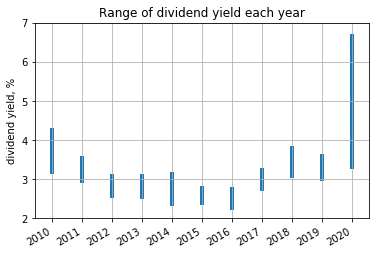

In [71]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

width = 50  # the width of the bars
plt.bar(year_ended_list,(dps/fy_high-dps/fy_low)*100, width,bottom=dps/fy_low*100,label='yield')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((2,7))
plt.title('Range of dividend yield each year')
plt.ylabel('dividend yield, %')
#plt.legend()
plt.grid()

# show plot
plt.show()

The dividend yield has varied over the evaluation period.  IN 2020 the stock price has fallen and the yields have risen on account of this. Historically between 2 and 4 percent dividend yield has been observed. 

**Payout ratio**  
The payout ratio is plotted using net income and free cash flow (Net cash provided by operating activities).

In [72]:
#line 0: Net income
net_income = df_metrics.iloc[1].to_numpy()[1:].astype('float')[::-1]
# line 3: Free cash flow, Net cash provided by operating activities 
free_cash_flow =  df_metrics.iloc[4].to_numpy()[1:].astype('float')[::-1]
# line 4: Dividends
dividends =  df_metrics.iloc[5].to_numpy()[1:].astype('float')[::-1]

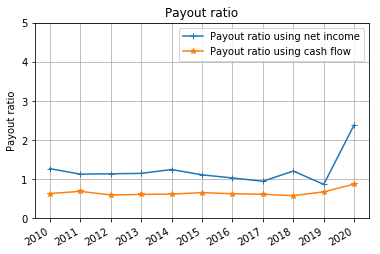

In [73]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Payout ratio')

ax1.plot(year_ended_list,dividends/net_income, '-+',label='Payout ratio using net income')
ax1.plot(year_ended_list,dividends/free_cash_flow, '-*',label='Payout ratio using cash flow')

ax1.tick_params(axis='y')
ax1.set_ylim((0,5))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Payout ratio')
plt.show()

As can bee seen in the plot, the payout ratio using cash flow is less than one and using net income is less than two except for 2020.  This metric is not that useful for a REIT because of the 90% payout requirement.

**Return on equity**  
Sometimes return on equity (RoE) is referred to as stockholder's return on investment. It reveals the rate at which shareholders earn income on their shares. Buffett always looks at RoE to see whether a company has consistently performed well compared to other companies in the same industry. RoE is calculated as follows:

$\text{Return on Equity (RoE)} = \frac {\text{Net Income}} {\text{Shareholder's Equity}}$

Looking at the RoE in just the last year isn't enough. The investor should view the RoE from the past five to 10 years to analyze historical performance.

$\text{Shareholders’ Equity} = \text{Total Assets} − \text{Total Liabilities}$    

For this company, this method of getting Shareholders’ Equity gives negative values.  On the Consolidated Balance Sheets, there is a line for Total stockholders’ equity, which is used.

In [74]:
# line 1: Shareholder equity
shareholder_equity =  df_metrics.iloc[2].to_numpy()[1:].astype('float')[::-1]

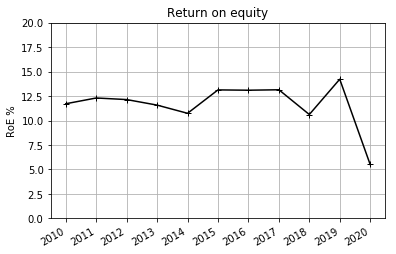

In [75]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('RoE %')

ax1.plot(year_ended_list,net_income/shareholder_equity*100, '-+k')

ax1.tick_params(axis='y')
ax1.set_ylim((0,20))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Return on equity')
plt.show()

**Observation**  
The RoE has been about 12%, except for 2020. Reviewing the Fidelity report, the RoE is above industry average, except for 2020.

**Return on Assets**   
Return on assets is a profitability ratio that provides how much profit a company is able to generate from its assets. In other words, return on assets (RoA) measures how efficient a company's management is in generating earnings from their economic resources or assets on their balance sheet.

$\text{Return on assets (RoA)} = \frac {\text{Net Income}} {\text{Average Total Assets}}$

Calculating the RoA of a company can be helpful in comparing a company's profitability over multiple quarters and years as well as comparing to similar companies. However, it's important to compare companies of similar size and industry.

For example, banks tend to have a large number of total assets on their books in the form of loans, cash, and investments. A large bank could easily have over \\$2 trillion in assets while putting up a net income that's similar to companies in other industries. Although the bank's net income or profit might be similar to an unrelated company and the bank might have high-quality assets, the bank's ROA will be lower. The larger number of total assets must be divided into the net income, creating a lower ROA for the bank.

Similarly, auto manufacturing requires huge facilities and specialized equipment. A lucrative software company that sells downloadable programs online may generate the same net profits, but it could have a significantly higher ROA than its more asset-heavy counterparts. When utilizing this metric to compare productivity across businesses, it's important to take into account what types of assets are required to function in a given industry, rather than simply comparing the figures.

In [76]:
#line 6: Total assets
total_assets = df_metrics.iloc[6].to_numpy()[1:].astype('float')[::-1]

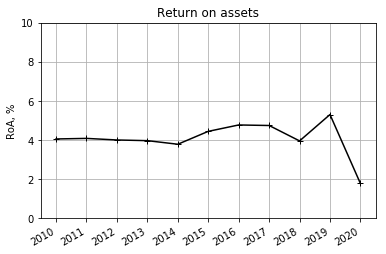

In [77]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('RoA, %')

ax1.plot(year_ended_list,net_income/total_assets*100, '-+k')

ax1.tick_params(axis='y')
ax1.set_ylim((0,10))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Return on assets')
plt.show()

**Observation:**  
The RoA is about 4.5%, except for 2020. Reviewing the Fidelity report, the RoA is above industry average, except for 2020.

**Debt to equity**   
The debt to equity ratio (D/E) is another key characteristic Buffett considers carefully. Buffett prefers to see a small amount of debt so that earnings growth is being generated from shareholders' equity as opposed to borrowed money. The D/E ratio is calculated as follows:

$\text{Debt-to-Equity Ratio} = \frac {\text{Total Liabilities}} {\text{Shareholders' Equity}}$

This ratio shows the proportion of equity and debt the company uses to finance its assets, and the higher the ratio, the more debt—rather than equity—is financing the company. A high debt level compared to equity can result in volatile earnings and large interest expenses. For a more stringent test, investors sometimes use only long-term debt instead of total liabilities in the calculation above.

In [78]:
#line 2: Total liabilities
total_liabilities = df_metrics.iloc[3].to_numpy()[1:].astype('float')[::-1]

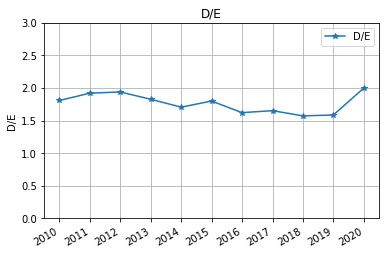

In [79]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('D/E')

#ax1.plot(year_ended_list,dividends/net_income, '-+',label='Payout ratio using net income')
ax1.plot(year_ended_list,total_liabilities/shareholder_equity, '-*',label='D/E')

ax1.tick_params(axis='y')
ax1.set_ylim((0,3.0))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('D/E')
plt.show()

**Observation:**  
D/E is below 2 and has been falling every year from 2013 to 2019.  Reviewing the Fidelity report, the D/E is above industry average.

**Profit Margin**  
A company's profitability depends not only on having a good profit margin, but also on consistently increasing it. This margin is calculated by dividing net income by net sales. For a good indication of historical profit margins, investors should look back at least five years. A high-profit margin indicates the company is executing its business well, but increasing margins mean management has been extremely efficient and successful at controlling expenses.

$\text{Profit margin} = \frac {\text{net income}} {\text{net sales}}$


In [80]:
#line 0: Total revenue
total_revenue = df_metrics.iloc[0].to_numpy()[1:].astype('float')[::-1]

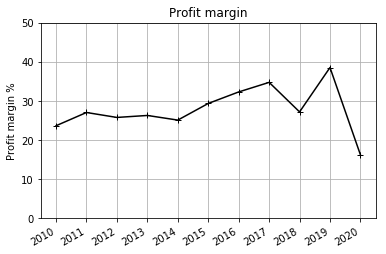

In [81]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Profit margin %')

ax1.plot(year_ended_list,net_income/total_revenue*100, '-+k')

ax1.tick_params(axis='y')
ax1.set_ylim((0,50))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Profit margin')
plt.show()

**Observation:**  
Over the years 2010 to 2019, the profit margin trend is increasing. Reviewing the Fidelity report, the profit margin is in line with the industry average.

**Safety margin**  
A safety margin is the difference between the intrinsic stock value and the market price of the stock.  The margin accounts for uncertainty in the estimations and methods used in the analysis.  The safety margin doesn't alway have to be the same number and can vary from company to company.

**One dollar premise**  
This is a financial test that shows the strength of the business and how well management has rationality allocated to the company's business.

From a company's income, subtract all dividends paid to shareholders.  What is left over is the company's retained earnings.  Now add the company's retained earnings over a 10 year period.  Next determine the difference between the company's current market value and its market value 10 years ago.  If the business has employed retained earnings unproductively over this ten year period, the market eventually catches up and will set a lower price on the business. 

In [82]:
retained_earnings = net_income.sum() - dividends.sum()
print('retained_earnings: ${:,.2f}B'.format(retained_earnings/1e9))

retained_earnings: $-0.36B


This metric does not apply to a REIT.

In [83]:
# Current market value, share price multiplied by number of shares
cmv_high = df_dcf_data['shares_outstanding'].iloc[-1]*fy_high[-1]
cmv_low = df_dcf_data['shares_outstanding'].iloc[-1]*fy_low[-1]
print('Current market value: ${:,.2f}B to ${:,.2f}B'.format(cmv_low/1e9,cmv_high/1e9))

Current market value: $4.84B to $9.93B


In [84]:
# Past market value, share price multiplied by number of shares
pmv_high = df_dcf_data['shares_outstanding'].iloc[0]*fy_high[0]
pmv_low = df_dcf_data['shares_outstanding'].iloc[0]*fy_low[0]
print('Past market value: ${:,.0f}B to ${:,.0f}B'.format(pmv_low/1e9,pmv_high/1e9))

Past market value: $4B to $5B


In [85]:
print('Difference in market value: ${:,.0f}B to ${:,.0f}B'.format((cmv_low-pmv_low)/1e9,(cmv_high-pmv_high)/1e9))

Difference in market value: $1B to $5B


This different in market value is greater than the retained earnings.

**Plot share price vs EPS**  
Looking at the one dollar premise in terms of share price and EPS.  

The one dollar premise: one dollar of earning should translate into one dollar of market value - this seems the same as a plot of EPS versus share price.

**Observations:**  
The range in share price is roughly the same across the range of EPS.  This means that investors are not valuing the company's EPS.

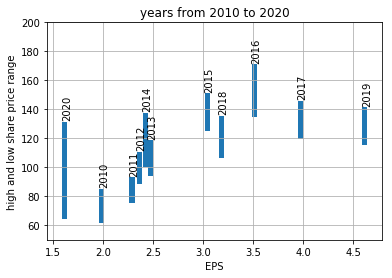

In [86]:
# plotting the eps data points
ax = plt.bar(EPS,fy_high-fy_low,width = .05,bottom=fy_low)
plt.grid()
plt.ylim((50,200))
plt.ylabel('high and low share price range')
plt.xlabel('EPS')
plt.title('years from 2010 to 2020')

rects = ax.patches

# Make some labels.
labels = [year_ended_list[i].strftime("%Y") for i in range(len(year_ended_list))]
for rect, label in zip(rects, labels):
    y_top =  rect.get_y() + rect.get_height()
    plt.text(rect.get_x(), y_top+1, label, rotation=90,va='bottom')    

plt.show()

### Market metrics <a id="section9-4"></a>
The share price is determined by the market. The value is determined by the analyst.

The ISV has been estimated by various methods above and the range is from \\$63 to \\$95.  A 20% discount on this range is \\$50 to \\$76. As of 19 Sept, 2021, the stock price is \\$67.68, which is within this range.  

## 10) Peer analysis <a id="section10"></a>
See the Fidelity report, the company seems to be in the middle of its peers.

## 11) Conclusion  <a id="section11"></a>
Conclusions from each of the sections    

- Quick look:
 - Current news: A search for news on the internet did not discover anything of significance. The company’s fiscal year is the same as the calendar year, January to December. The company’s financial results for most of 2020 and 2021 are impacted by the pandemic.  With the wide availability of the vaccine, some segments of the economy are starting to open up in the fourth quarter of 2021, however inflation, vaccine hesitancy and labor shortages present indications that the economy is in transition.  
 - Review quarterly results: No surprises. Covide variants are ongoing. 
 - Average daily volume: 462,839.  Doesn’t meet my 1M per day threshold, but I’m going to give it a pass since it’s a REIT and therefore smaller than large industrial companies. Realty Income Corporation, a well known REIT has an average daily volume of 4,831,218.
 - Dividend yield: 3.5%
 - Debt to equity ratio: 1.74
 - Dividend Payout Ratio: 2.46
- NACI stock selection guide analysis: Share price is trading in an upward trend from 2010 to 2016, then reversed for the years 2017 to 2019. The effects of Covid-19 are in the 2020 financial results. Revenues are increasing a bit, except for 2020 and earnings are slowing increasing, except for 2020.
 - estimated price range in 5 years: 147.69 to 196.23 and the current stock price is \\$121.92, which implies that the stock has room to grow.
- Discounted cash flow analysis, base line:
 - rev growth at 4.31%, debt increasing at 4.08%, shares increasing at 2.08% 
 - intrinsic stock value: \\$165.72, the current stock price is \\$121.92, which means that it is in the value range.
- DCF Scenarios: Adjusting the weighted average cost of capital to 8.0% to reflect possible higher interest and inflation in the future and changing the revenue growth rate to a modest 3.00%, the intrinsic value drops to $36.42.
- Dividend Discount Model: The average dividend growth rate is 4.63%.
 - NPV: Using the current share price and an ending share price equal to the current price, the NPV is \\$20.01.
 - IIR: 4.93%.  
 - Gordon growth model: Using a rate of 4% for the rate of return for equity investors and a growth rate in dividends of 2%, the value of the stock is \\$219.22
- Value analysis:
 - Return on equity: flat except for 2020
 - Return on Assets:  flat except for 2020
 - Debt to equity: D/E < 2, trending down except for 2020
 - Profit Margin: variable, trending sideways except for 2020
 - One dollar premise: no retained earning being a REIT, difference in market value: \\$1B to \\$5B
 - Plot share price vs EPS: flat
- Peer analysis: See the Fidelity report, the company seems to be in the middle of its peers.

Recommendation: Except for 2020, looks good.  Buy

## 12) Notes  <a id="section12"></a>
The following notes outline the changes to the DCF model for financial and REIT companies.  

**Valuing a REIT**  
Notes from Valuepro Book, page 237  

- NOPM: To calculate operating income take rental revenue and subtracted total real estate expenses and G&A expenses. To arrive at the NOPM divide the adjusted income from real estate by real estate rental revenue. For the REIT, take income from real estate, which includes depreciation and amortization, and subtract GSA. Exclude other income, gains on sale of real estate and interest expenses.
- REIT has no traditional R&D costs

REIT is not taxed at the corporate level, tax rate: should be near zero.

Depreciation and capital expenditures are significantly higher for REITs than in other companies.

New property acquisitions are not directly accounted for in the DCF model for a REIT.

- Working capitol: accounts payable, rents and security deposits
 - Short term assets: cash, rents and other receivables and prepaid expenses
 - Short term liabilities: accounts payable, advance rents security deposits
 
Working capital is almost zero, which is similar to other financial companies.

The consolidated balance sheet lists the assets as: 
- Real estate held for investment, at cost:
 - Land
 - Buildings and improvements
 - Total real estate held for investment, at cost
 - Less accumulated depreciation and amortization
 - Real estate held for investment, net
- Real estate and lease intangibles held for sale, net
- Cash and cash equivalents <- current asset
- Accounts receivable, net <- current asset
- Lease intangible assets, net
- Other assets, net

The line items indicated above have been taken to be the current assets. Intangibles and long term items have been excluded.

The consolidated balance sheet lists the liabilities as: 
- Distributions payable <- current liabilities
- Accounts payable and accrued expenses <- current liabilities
- Lease intangible liabilities, net
- Other liabilities
- Line of credit payable and commercial paper <- current liabilities
- Term loans, net
- Mortgages payable, net <- current liabilities
- Notes payable, net

The line items indicated above have been taken to be the current liabilities.

**Valuing a financial company**  
Notes from Valuepro Book, page 206  

- Total revenue comes from the total interest and dividend income line on the income statement.  The calculation of operating income is more inclusive for a financial company than for an industrial or high tech company.  For financial companies, operating revenue includes all normal revenue items plus interest income, dividends received and other investment income.

- Cost of Goods Sold (CGS) comes from the Total interest expense line on the statement of income. 
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

- $\text{Cost of Goods Sold (CGS)} = \text{Total interest expense} + \text{Total non-interest expense}$  
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

- Depreciation and amortization of premises and equipment from Consolidated Statements of Cash Flows.  
- Amortization of other acquisition-related intangible assets is not included.

- New investment and Depreciation: Property, plant and equipment expenditures and depreciation charges are significantly lower for a financial company.  A typical manufacturing company, in order to grow its business, invests a significant portion of its revenues in plant, property and equipment (PPE).  Financial companies invest very little in the way of PPE.  However, software, risk management systems and acquisitions of other businesses, need to be included.

From the Consolidated Statements of Cash Flows, under Cash Flows from Investing Activities
- Purchases of premises and equipment
- Purchases of leased equipment, net

- Working capital supports manufacturing and service activities of nonfinancial companies.  For financial companies, their principal liabilities  and assets are financial claims that take the place of working capital.  Because there is no differentiation between current and long term assets and liabilities for a financial company, we adjust working capital charges to zero.  A financial company generally invests all of its funds in other financial assets, which have characteristics of current assets rather than PP&E.  
$\text{Accounts Receivable} = 0$  
$\text{Inventories} = 0$  
$\text{Accounts Payable} = 0$  
$\text{working capital} = 0$ 

- Short term assets:  The balance sheets of most financial companies do not separate assets and liabilities into current and long term categories.  When calculating the short term assets take the total assets and subtract goodwill and intangible assets also subtract other assets of questionable value.  Subtract long term assets such as PP&E from total assets.  

$\text{Short term assets} = \text{Total assets} - \text{good will and others of questionable value} - \text{Premises and equipment}$

- A financial company's principal liabilities are deposits, Federal funds purchased, trading account liabilities, insurance policy and claims reserves, contract holder funds and short term borrowing.  To be consistent with the treatment of interest and an operating expense for financial companies, include long term debt in the short term liability category.  
- Short term liabilities:  Include long term debt.  

$\text{Long term debt} = 0$

This company was selected for analysis because it is on the Dividend Aristocrat list and passes the quick look tests.  This notebook will be used as a template when analyzing other companies.

Dividend: Aristocrat, Achiever & Champion
- Aristocrat: S&P 500 Dividend Aristocrats is designed to measure the performance of S&P 500 index constituents that have followed a policy of consistently increasing dividends every year for at least 25 consecutive years.
- Achiever: The Broad Dividend Achievers Index. Eligible companies must be incorporated in the U.S. or its territories, trade on the NYSE, NASDAQ or AMEX, and have increased its annual regular dividend payments for the last 10 or more consecutive years.
 - https://dividendvaluebuilder.com/dividend-achievers-list/
 - https://www.marketbeat.com/dividends/achievers/
- Champion: This list includes companies that had increased their dividend for at least 25 consecutive years, and includes additional companies that had paid higher dividends without having increased the payout in every calendar year.
 - https://dividendvaluebuilder.com/dividend-champions-list/
 - https://www.dividendgrowthinvestor.com/p/dividend-champions-list.html

## 13) References  <a id="section13"></a>

1. O'Hara, Thomas E., and Ken Janke. Starting and Running a Profitable Investment Club: the Official Guide from the National Association of Investors Corporation. Times Business, 1998. 
2. Gray, Gary, et al. Streetsmart Guide to Valuing a Stock: the Savvy Investors Key to Beating the Market. McGraw-Hill, 2004. 
3. Robert G. Hagstrom, The Warren Buffett Way, Wiley, 2013

## 14) Additional plots <a id="section14"></a>

### NAIC section 2: Evaluating management
See page 86, figure 9-1.  
- % pretax profit on sales, net before taxes/rev
- % earned on equity (E/S divided by Book value), use equity

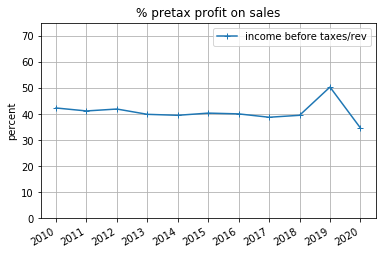

In [87]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')
#ax1.plot(year_ended_list,net_income, '-+',label='net income')
ax1.plot(year_ended_list,df_dcf_data['income_before_income_taxes']/df_dcf_data['revenue']*100, '-+',
         label='income before taxes/rev')
#ax1.plot(year_ended_list,df_dcf_data['revenue'], '-+',label='revenue')
#ax1.plot(year_ended_list,free_cash_flow, '-*',label='free cash flow')

ax1.tick_params(axis='y')
ax1.set_ylim((0,75))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('% pretax profit on sales')
plt.show()

Over the years 2010 to 2018, pretax profit on sales has a downward trend.  

In 20219 there was a gain on sale of real estate, net of tax, of \\$116,393k. The \\$116.4 million gain on sale of real estate, net for the year ended December 31 2019 is primarily due to the following:
- \\$85.1 million related to the sale under the threat of condemnation of 11.7 acres of San Antonio Center,
- \\$28.3 million related to the sale of three properties and one land parcel,
- \\$2.6 million net gain related to condominium unit sales that have closed at our Assembly Row and Pike & Rose properties.

In [88]:
# line 1: Shareholder equity
shareholder_equity =  df_metrics.iloc[2].to_numpy()[1:].astype('float')[::-1]

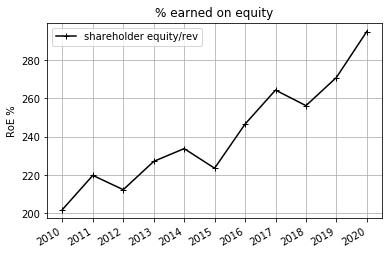

In [89]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('RoE %')

ax1.plot(year_ended_list,shareholder_equity/df_dcf_data['revenue']*100, '-+k',
        label='shareholder equity/rev')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,20))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('% earned on equity')
plt.show()

Percent earned on equity has been increasing over the evaluation period.  

### NAIC section 3: 5 year estimated EPS, preferred method
See page 87 and figure 10-1, Need the following data:  
- estimate sales in 5 years based on sales growth
- NOPM
- Tax rate
- shares outstanding  

To get future EPS

#### Revenue and least square fit

In [90]:
# get linear fit for eps
y = df_dcf_data['revenue']/1e6
x = np.arange(len(y))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('revenue slope: {:.2f}'.format(m))

lstsq_fit = m*x + c  # data points for each year

revenue slope: 40.76


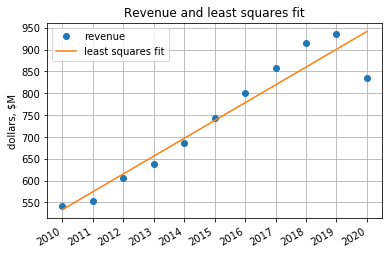

In [91]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $M')

ax1.plot(year_ended_list,df_dcf_data['revenue']/1e6, 'o',label='revenue')
ax1.plot(year_ended_list,lstsq_fit, '-',label='least squares fit')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Revenue and least squares fit')
plt.show()

Using the equation for the best fit line, find the y value for the eps point at five years in the future.

In [92]:
# estimated revenue in 5 years
rev_5yr_est = m*(x[-1]+5) + c
print('estimated rev in 5 years: ${:.1f}M'.format(rev_5yr_est))

estimated rev in 5 years: $1145.2M


In [93]:
#pm_eps_5yr_est = rev_5yr_est*nopm_avg*tax_rate_avg*1e6/df_dcf_data['shares_outstanding'].iloc[-1] 
pm_eps_5yr_est = rev_5yr_est*nopm_avg*1e6/df_dcf_data['shares_outstanding'].iloc[-1] 
print('using preferred method: estimated eps in 5 years: ${:.2f}'.format(pm_eps_5yr_est))

using preferred method: estimated eps in 5 years: $9.61


In [94]:
print('using historical eps trend: estimated eps in 5 years: ${:.2f}'.format(eps_5yr_est))

using historical eps trend: estimated eps in 5 years: $4.13


### NOP and net income
Comparing NOP with net income.  These should have the same trend.

In [95]:
#line 0: Net income
net_income = df_metrics.iloc[1].to_numpy()[1:].astype('float')[::-1]
# line 3: Free cash flow, Net cash provided by operating activities 
free_cash_flow =  df_metrics.iloc[4].to_numpy()[1:].astype('float')[::-1]
# line 4: Dividends
dividends =  df_metrics.iloc[5].to_numpy()[1:].astype('float')[::-1]

# NOP = (Revenue - Expenses)
nop = (df_dcf_data['revenue'].to_numpy() - \
    (df_dcf_data['cost_of_goods_sold'].to_numpy() + \
    df_dcf_data['general_and_administrative'].to_numpy() + \
    df_dcf_data['research_and_development'].to_numpy()) )

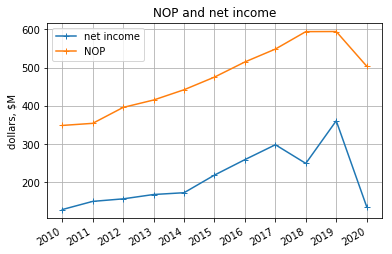

In [96]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $M')

#ax1.plot(year_ended_list,EBITDA/1e6, '-+',label='EBITDA')
ax1.plot(year_ended_list,net_income/1e6, '-+',label='net income')

ax1.plot(year_ended_list,nop/1e6, '-+',label='NOP')
#ax1.plot(year_ended_list,investment/1e6, '-+',label='investment')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,600))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('NOP and net income')
plt.show()

NOP and net income were different in 2018 and 2019. The decrease in net income for 2018 was due to the loss of a partnership and the gain in 2019 was for the sale of properties.

### Debt and NOP
Comparing D/E and LT debt/NOP.  D/E is the traditional way to look at a company's debt.  Some rules of thumb say that the D/E should not be above 2 or 3.  However the D/E company's typically vary by industry. The ratio of LT debt to NOP gives the number of years it would take the company to pay back debt from NOP, the lower the number the shorter amount of time.

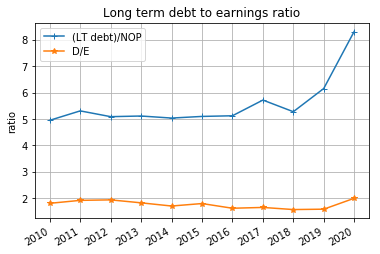

In [97]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('ratio')

ax1.plot(year_ended_list,df_dcf_data['long_term_debt']/nop, '-+',label='(LT debt)/NOP')
#ax1.plot(year_ended_list,total_liabilities/nop, '-+',label='(total_liabilities)/NOP')
ax1.plot(year_ended_list,total_liabilities/shareholder_equity, '-*',label='D/E')

ax1.tick_params(axis='y')
#ax1.set_ylim((-1,3))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Long term debt to earnings ratio')
plt.show()

In 2018 the ratio of LT debt to NOP started to increase, with a substantial jump in 2020.  This is because the company took financial measures against Covid effects on their tenants.

### NOP/shares and EPS
Plotting EPS and NOP/shares should show any differences in the trend.  

In [98]:
#line 1: earnings per share
EPS = df_NAIC_financials.iloc[1].to_numpy()[1:].astype('float')[::-1]

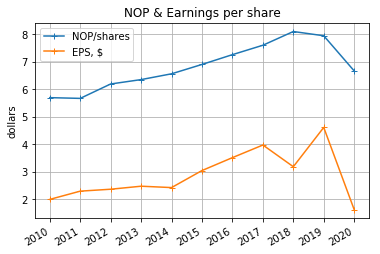

In [99]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars')

ax1.plot(year_ended_list,nop/df_dcf_data['shares_outstanding'], '-+',label='NOP/shares')
plt.plot(year_ended_list,EPS,'+-',label='EPS, $')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,3))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('NOP & Earnings per share')
plt.show()

The plot above shows that from 2010 to 2017, both NOP and EPS were increasing.  Then in 2018 the EPS fell by almost one dollar while the NOP/Shares increased. Loss from real estate partnerships increased to \\$3.4 million in 2018 compared to \\$0.4 million in 2017. This increase is due primarily to our share of losses related to the hotel joint ventures at Assembly Row (hotel opened in August 2018) and Pike & Rose (hotel opened in March 2018).

### NAIC plot that includes NOP
NOP & Earnings per share is plotted on the SSG NAIC chart.

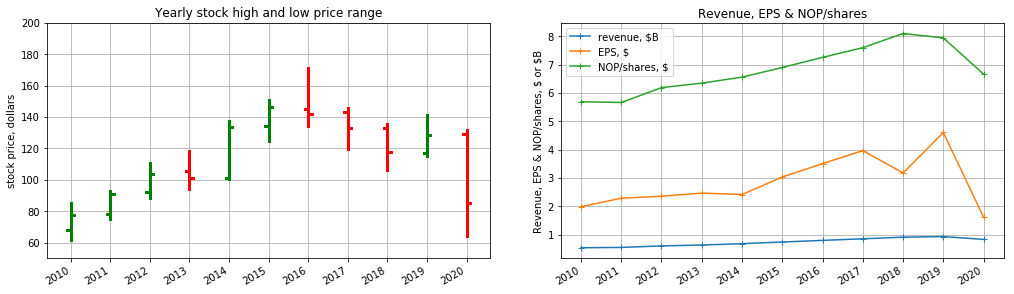

In [100]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

# figsize() function to adjust the size
plt.subplots(figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
width = 3  # the width of the bars
#plt.bar(year_ended_list,fy_high-fy_low, width,bottom=fy_low,label='price')
j = 0
for i in year_ended_list:
    color = 'green'
    if fy_open[j] > fy_close[j]: color= 'red'
    # high/low lines
    plt.plot([i,i],[fy_low[j],fy_high[j]],color=color, linewidth=width)
    # open marker
    plt.plot([i,i-relativedelta(months=1)], [fy_open[j],fy_open[j]], color=color, linewidth=width)
    # close marker
    plt.plot([i,i+relativedelta(months=1)], [fy_close[j],fy_close[j]], color=color, linewidth=width)
    j += 1

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((50,200))
plt.title('Yearly stock high and low price range')
plt.ylabel('stock price, dollars')
#plt.legend()
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

plt.plot(year_ended_list,revenue/1e9,'+-',label='revenue, $B')
plt.plot(year_ended_list,EPS,'+-',label='EPS, $')
plt.plot(year_ended_list,nop/df_dcf_data['shares_outstanding'], '-+',label='NOP/shares, $')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.yscale('log')
#plt.yticks([0.1,1,10,100,1000,10000],['0.1','1','10','100','1000','10000'])
#plt.ylim((0.1,1000))
plt.title('Revenue, EPS & NOP/shares')
plt.ylabel('Revenue, EPS & NOP/shares, \\$ or \\$B')
plt.legend()

plt.grid()

# space between the plots
plt.tight_layout(4)

# show plot
plt.show()

Revenue, EPS & NOP/shares are plotted on the right.  NOP/shares and EPS should have the same trend.  

### NOP/Dividends  
Another way to look at dividend payout and the ability of the company to support dividend payments is to look at the ratio of NOP to dividends.  Ratio should be high and never below 1.  

In [101]:
dividends = df_metrics.iloc[5].to_numpy()[1:].astype('float')[::-1]

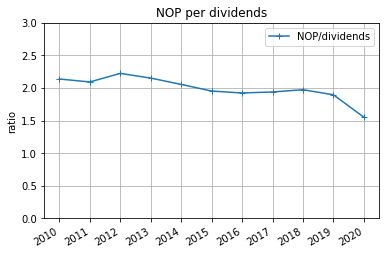

In [102]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('ratio')

ax1.plot(year_ended_list,nop/dividends, '-+',label='NOP/dividends')

ax1.tick_params(axis='y')
ax1.set_ylim((0,3))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('NOP per dividends')
plt.show()

The ratio of NOP per total dividends is shown above.  For most years NOP is two times the dividends, except for 2020.